In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import pyplot as plt
import os.path

In [3]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [4]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

C:\Users\USUARIO\anaconda3\envs\IDSA37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


# Generación de datos

In [5]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Selección del Dataset

Dos tipos de datasets:
- generate_gaussians_distributions: Generado con dos gaussianas
- generate_elipse_data: Generado con distribución uniforme en el cuadrado [-1, 1], [-1, 1] y recortando con una elipse en el centro

Descomentar/comentar las lineas correspondientes para seleccionar uno u otro dataset

In [6]:
X, y = generate_gaussians_distributions()
# X, y = generate_elipse_data()

# Problema 1: Graficamos

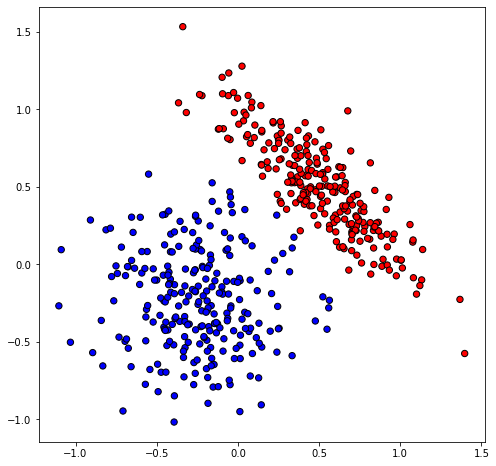

In [7]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

# Inicialización del modelo

Para Naive Bayes probar con: 
- priors=None, var_smoothing=1e-09 (Ambos datasets)
- priors=None, var_smoothing=0.2 (para generate_elipse_data) var_smoothing=1 (para generate_gaussians_distributions) 
- priors=[0.5, 0.5] (para generate_elipse_data) priors=[0.7, 0.3] (para generate_gaussians_distributions), var_smoothing=1e-09 

Para QDA:
- priors=None, reg_param=0.0, store_covariance=True (Ambos modelos)
- Cambio los parámetros como quiera y verifique si ocurre lo esperado

In [8]:
model = GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
# Entrenamiento del modelo
model.fit(X,y)

GaussianNB()

In [10]:
if type(model)==GaussianNB:
    print(model.classes_) 
    prior1, prior2 = model.class_prior_
    sigma1, sigma2 = model.sigma_
    mu1, mu2 = model.theta_

[0. 1.]


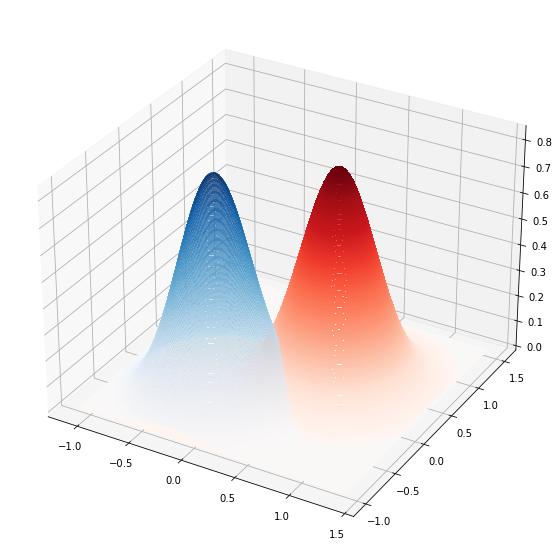

In [11]:
plot_gaussians(X, mu1, sigma1, mu2, sigma2, prior1, prior2)

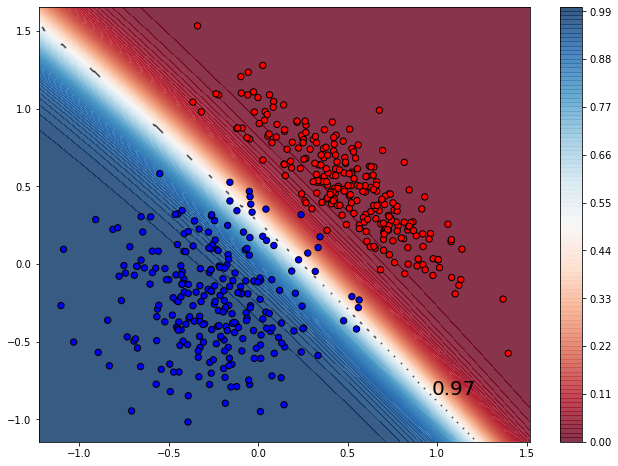

In [12]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

# Pregunta 1:
## De acuerdo a los sataset graficados podemos comprobar que las siguientes afirmaciones son correctas:
#### El dataset: generate_gaussians_distributions(), es linealmente separable
#### Es de esperar que QDA tenga una mejor performance en generate_elipse_data() que Naive Bayes
#### generate_elipse_data() genera datos uniformente distribuidos y asigna clase azul a aquellas observaciones que quedan dentro de una elipse.

# Problema 2

#### Accuracy para Naive Bayes refierido al dataset generate_gaussians_distributions():

In [13]:
print(score)

0.97


# Pregunta 5:
#### Aplicar var_smoothing=1 para Naive Bayes del dataset Gaussians_Distributions

In [14]:
model = GaussianNB(priors=None, var_smoothing=1)
model.fit(X,y)

GaussianNB(var_smoothing=1)

In [15]:
if type(model)==GaussianNB:
    print(model.classes_) 
    prior1, prior2 = model.class_prior_
    sigma1, sigma2 = model.sigma_
    mu1, mu2 = model.theta_

[0. 1.]


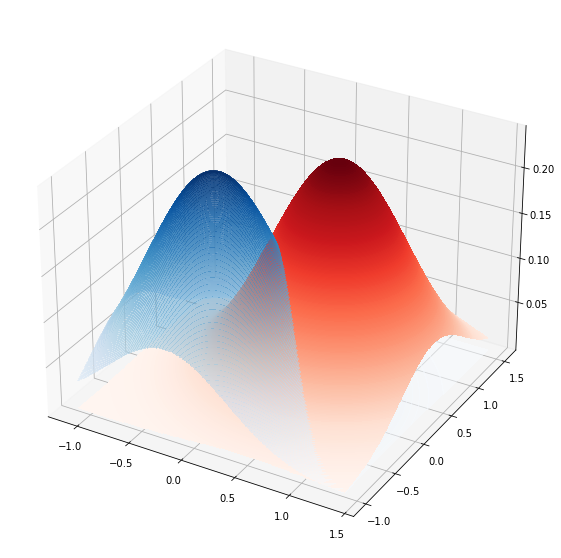

In [16]:
plot_gaussians(X, mu1, sigma1, mu2, sigma2, prior1, prior2)

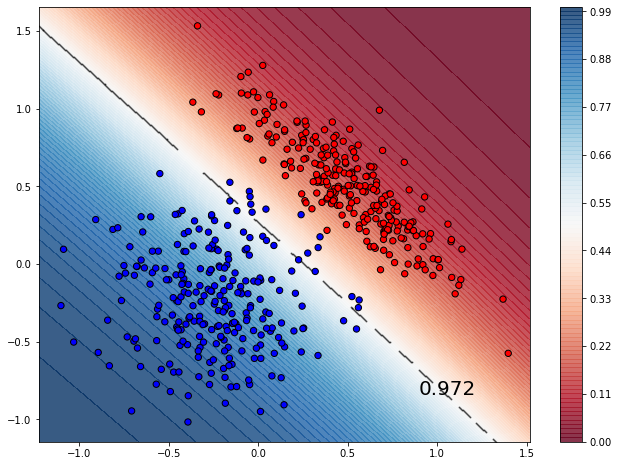

In [17]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [18]:
print(score)

0.972


In [19]:
print(sigma1, sigma2) # sigmas smoothing=1 

[0.33374559 0.33490137] [0.32312018 0.33889183]


In [20]:
#[0.09812204 0.09927783] [0.08749664 0.10326828] sigmas smoothing=1e-09

#### Las varianzas de las Gaussianas estimadas aumentan
#### El modelo es mas "inseguro" al momento de clasificar

# Pregunta 6
#### Supongamos que a pesar de que la cantidad de puntos que tenemos para las dos clases es la misma, se sabe que la probabilidad de seleccionar la Gaussiana que genera azules es 0.3 y la de generar los rojos es 0.7. Cambiar las priors y entrenar nuevamente Naive Bayes

In [21]:
model = GaussianNB(priors=[0.7, 0.3], var_smoothing=1e-09)
model.fit(X,y)

GaussianNB(priors=[0.7, 0.3])

[0. 1.]


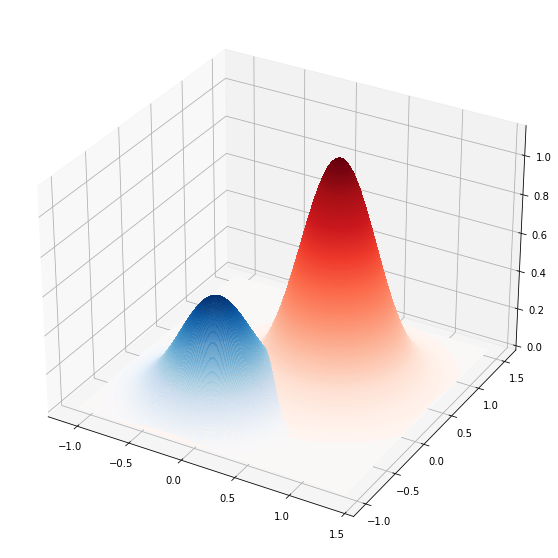

In [22]:
if type(model)==GaussianNB:
    print(model.classes_) 
    prior1, prior2 = model.class_prior_
    sigma1, sigma2 = model.sigma_
    mu1, mu2 = model.theta_

plot_gaussians(X, mu1, sigma1, mu2, sigma2, prior1, prior2)

#### Se Observa que la estimación de la Gaussiana azul tiene menor altura que en el caso anterior

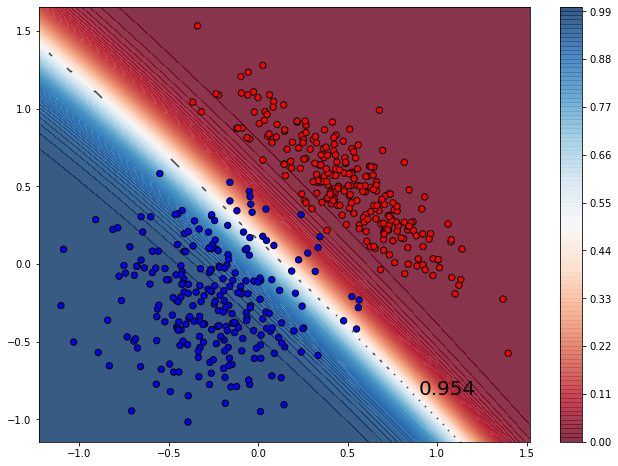

In [23]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

#### Se observa que el umbral de decisión se corre hacia el lado de los azules clasificando algunos azules como rojos